<a href="https://colab.research.google.com/github/sohagalam2/Python-Code-Practice/blob/master/Linear_Regression_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
from torch import nn ##nn contains all of pytorch's building block for neural network
import matplotlib.pyplot as plt

#check pythorch version
torch.__version__

'2.9.0+cu126'

##Data Preparing and loading
*Data can be almost anything ... in machine learing

*Excel spreadsheet

*Imanges of anykind

*Text

*Audio

Machine learning is a game of two parts:
  
  1.Get data into a numerical representation
  
  2. Build model to learn patterns in that numerical representation


We will use a linear regression formula to make straight line with *known* **parameters** - parameters is something model learn.

In [102]:
#create a known parameters
#for the formula y = a + bx , here bias=a, weight=b
weight = 0.7
bias = 0.3

#create some value here

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [103]:
len(X), len(y)

(50, 50)

###Splitting data into training and test sets (one of the most important concept of machine learning in general)

In [104]:
#create train/split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] # বাকি ডেটা গুলো এখানে নেওয়া হচ্ছে এই আরকি।
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

*visualize, visualize, visualize*

In [105]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):


  """
  plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

  #Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
    #show the legend
    plt.legend(prop={"size":14})


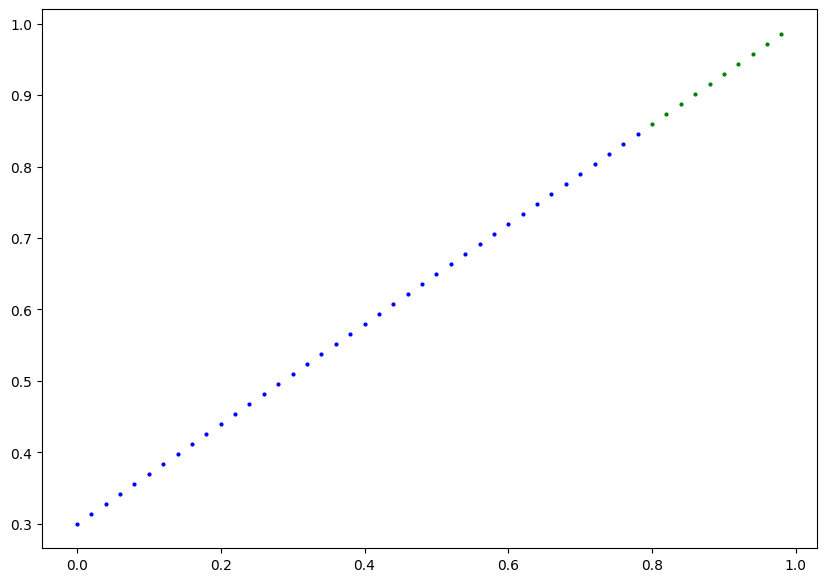

In [21]:
plot_predictions()

## 2. Build Model

Our first pytorch Model

This is very exciting

In [106]:
# Create a linear regression model class

class LinearRegressionModel(nn.Module): # <-- almost everything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    #initialize the model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    #forward method to define computation in the model
  def forward(self, x: torch.tensor) ->torch.tensor:
    return self.weights*x + self.bias

###Pytorch model building essentials

* torch.nn - contains all the buildings for comuputational graphs (another name of neural network)

* tprch.nn.Parameter what parameters should our model try and learn, often a PyTorch layer from torch.nn will set this for us.

* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()

* torch.optim - this where the optimizers in PyTorch live, they will help with better descent.

* def forward() - All nn.Module subclassess require you to overwrite forward(), this method defines what happens in the forward computation

##Checking the contents of our PyTorch model
Now we've created a model, let's see what's inside

So we can check our model parameters or what's inside our model using `.parameters().`

In [107]:
#create a random seed

torch.manual_seed(42)

#create a instance of the model (this is a subclass)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
#list named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.


When we pass data through our model, it's going to run it through the `forward()` method.


In [108]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [109]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

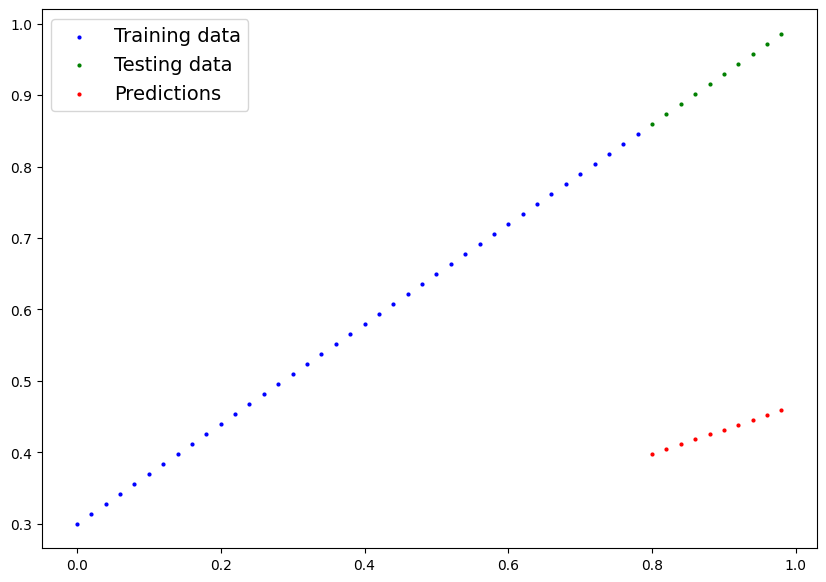

In [110]:
plot_predictions(predictions=y_preds)

##Train Model

The whole idea of training is for a model to move from some unknown parameters (these may be random) to some *known* parameters.
Or in other words from a poor representation of the data to a better representation of the data.

one way to measure how poor or how wrong your model predictions are is to use a loss function.

*Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.*

Things we need to train-

* **Loss funciton:** A function to measure how wrong your model's predictions are to the ideal outputs. lower is better.

* **Optimizer** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)

And specifically for PyTorch, we need

* A training loop
* A testing loop

In [111]:
# Check out our model's parameters ( a parameter is a value that
# the model set itself).
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [112]:
# Setup a loss function
loss_fn = nn.L1Loss() # what loss function decides how wrong our model
                      # is.

# Setup on optimizer (SGD = stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) #lr = learning rate = possibly the most hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch.

We need of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data- also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)

3. Optimizer zero grad

4. Loss backward - move backwards through the network to calculate the gradients of each of the model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [127]:
torch.manual_seed(42)
# An epoch is one loop through the data ...
epochs = 250

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
  #1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) #(input, target)
  # print(f"Loss: {loss}")

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the
  #model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not need for evaluation/testing
  with torch.inference_mode(): #this turns of gradient tracking and a couple more things behind the scene
    #1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 20 == 0:

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    #print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 20 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 40 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 60 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 80 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 100 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 120 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch

In [128]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

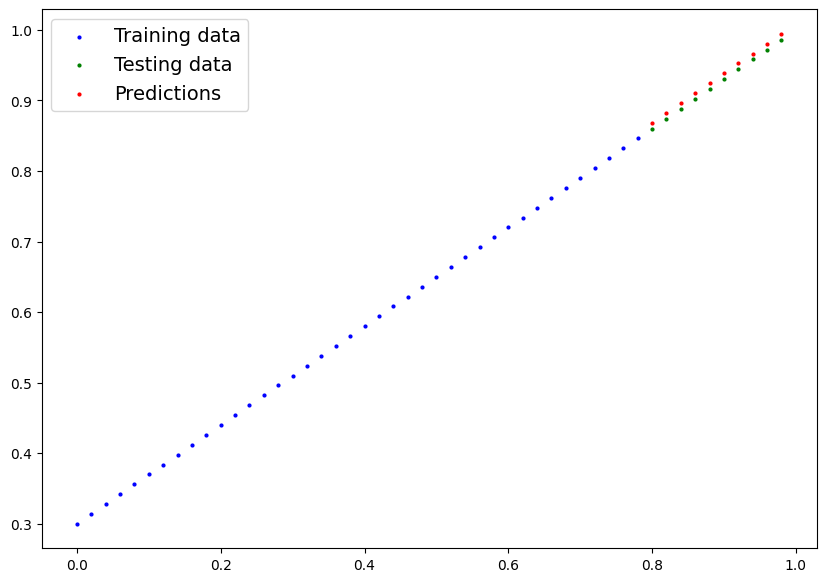

In [129]:
plot_predictions(predictions=y_preds_new);